# DL_Assignment1

## Roll Number: CS23MTECH14003

## Name: Hrishikesh Hemke

Q1] Perceptron learning algorithm
[10 = dataset creation 2 + perceptron learning algorithm 5 + analysis 3]
Implement perceptron learning algorithm for classifying a linearly separable dataset in 2D. Note
that you have to create such a dataset with at least 1000 data points. Plot the dataset before and
after training (with the classifier).
Discuss your observations with respect to number of iterations required for perfect classification (k)
by varying the level of separability (γ from the class discussions) in the dataset. (Hint: compute
the average value of k for each level of γ, and do this for about 5 values of γ. Observe if you can
relate to the result discussed in class)


DATASET CREATION

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def gen_linearly_separable_dataset(size, separation_level):
    # Randomly generatng class 1 points
    class1_points = np.random.normal(loc=0, scale=1, size=(size // 2, 2))
    class1_labels = np.ones((size // 2, 1))

    # Randomly generatng class 2 points with a separation
    class2_points = np.random.normal(loc=separation_level, scale=1, size=(size // 2, 2))
    class2_labels = -1 * np.ones((size // 2, 1))

    # Combine the two classes
    X = np.vstack((class1_points, class2_points))
    y = np.vstack((class1_labels, class2_labels))

    # Mixing the dataset
    shuffle_indices = np.random.permutation(size)
    X = X[shuffle_indices]
    y = y[shuffle_indices]
    return X, y.flatten()

INITIALIZING WEIGHTS AND POLTING DATA DECISION BOUNDARY FUNC

In [18]:
def initialize_weights(num_features):
    return np.random.rand(num_features)

def plot_separate_decision_boundaries(X, y, initial_weights, trained_weights, separation_level):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plotting initial decision boundary
    axes[0].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o',c='c')
    axes[0].scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x',c='y')
    x_initial_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_initial_boundary = (-initial_weights[0] / initial_weights[1]) * x_initial_boundary - initial_weights[2] / initial_weights[1]
    axes[0].plot(x_initial_boundary, y_initial_boundary, '-g', label='Initial Decision Boundary')
    axes[0].set_title(f'Initial Decision Boundary (Separation Level: {separation_level})')
    axes[0].set_xlabel('Feature 1')
    axes[0].set_ylabel('Feature 2')
    axes[0].legend()

    # Plotting trained decision boundary
    axes[1].scatter(X[y == 1, 0], X[y == 1, 1], label='Class 1', marker='o',c='c')
    axes[1].scatter(X[y == -1, 0], X[y == -1, 1], label='Class 2', marker='x',c='y')
    x_trained_boundary = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
    y_trained_boundary = (-trained_weights[0] / trained_weights[1]) * x_trained_boundary - trained_weights[2] / trained_weights[1]
    axes[1].plot(x_trained_boundary, y_trained_boundary, '-r', label='Trained Decision Boundary')
    axes[1].set_title(f'Trained Decision Boundary (Separation Level: {separation_level})')
    axes[1].set_xlabel('Feature 1')
    axes[1].set_ylabel('Feature 2')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

PERCEPTRON LEARNING ALGORITHM

In [19]:
def train_perceptron(X, y, weights, nb_epochs_max):
    k = 0
    for epoch in range(nb_epochs_max):
        nb_changes = 0
        for i in range(X.shape[0]):
            if np.dot(X[i], weights) * y[i] <= 0:
                weights = weights + y[i] * X[i]
                nb_changes += 1
                k +=1 
        if nb_changes == 0:
            break
    return weights,k

ANALYSIS

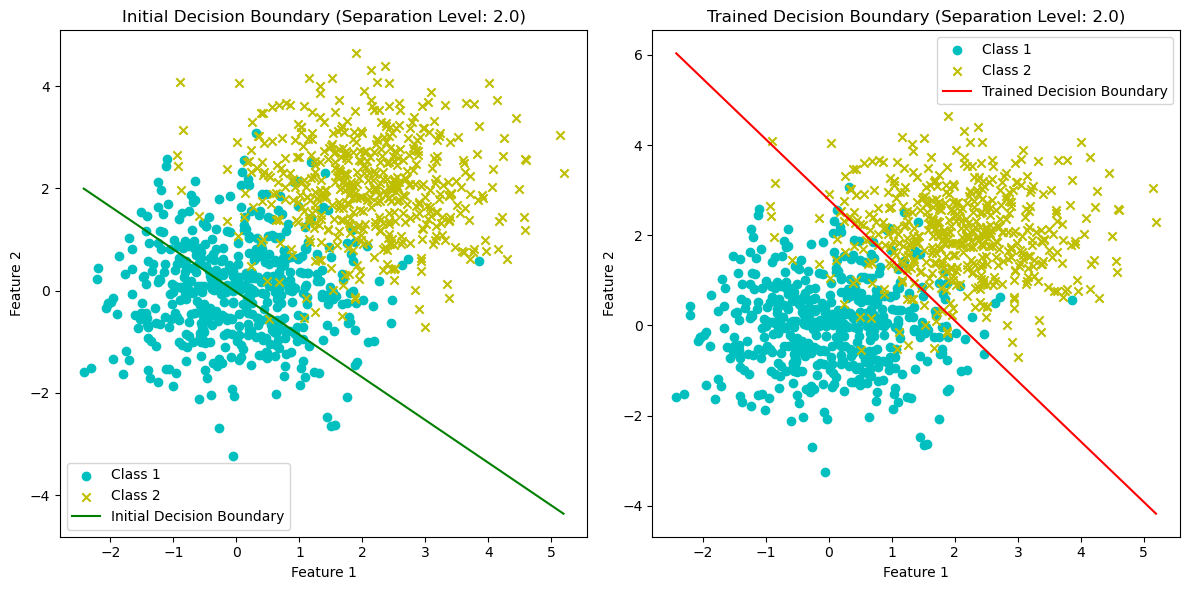

Average changes: 10978


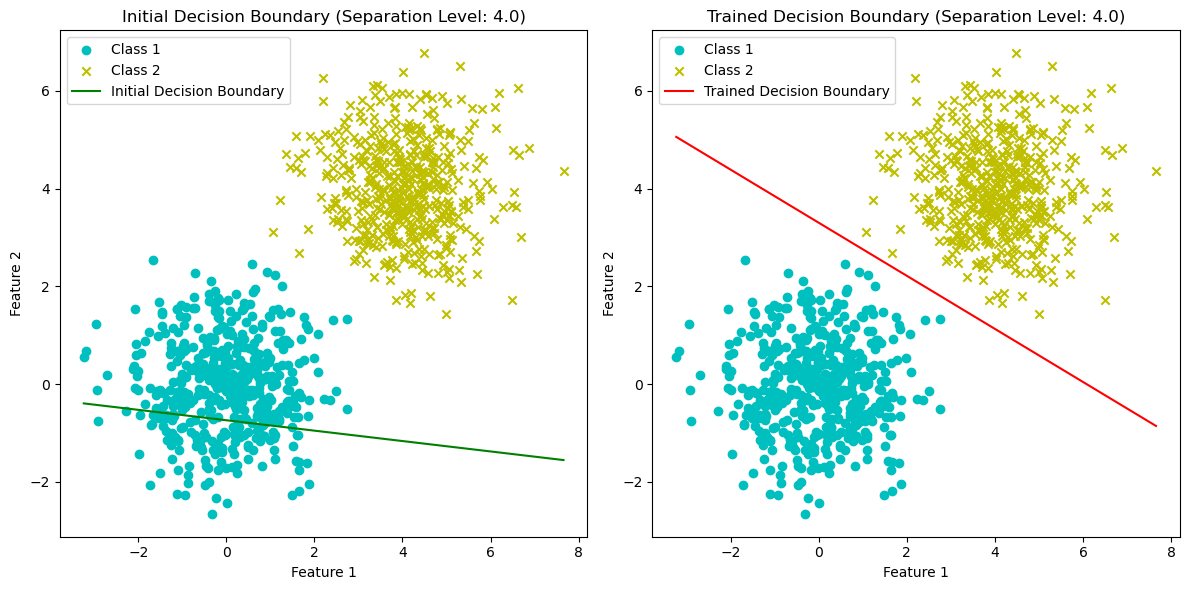

Average changes: 27


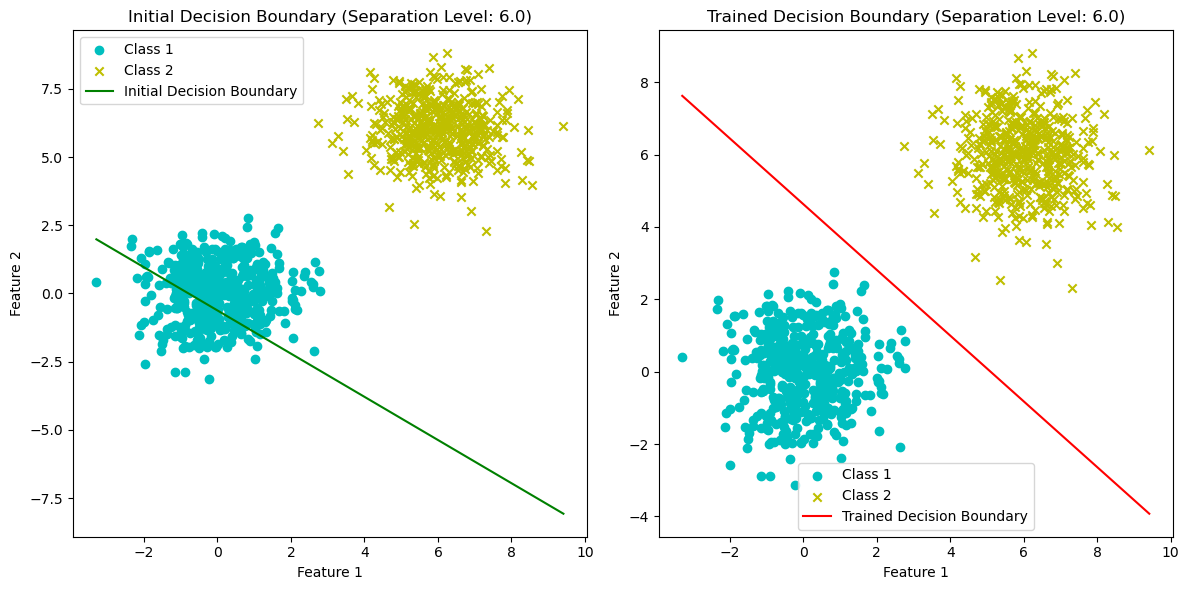

Average changes: 16


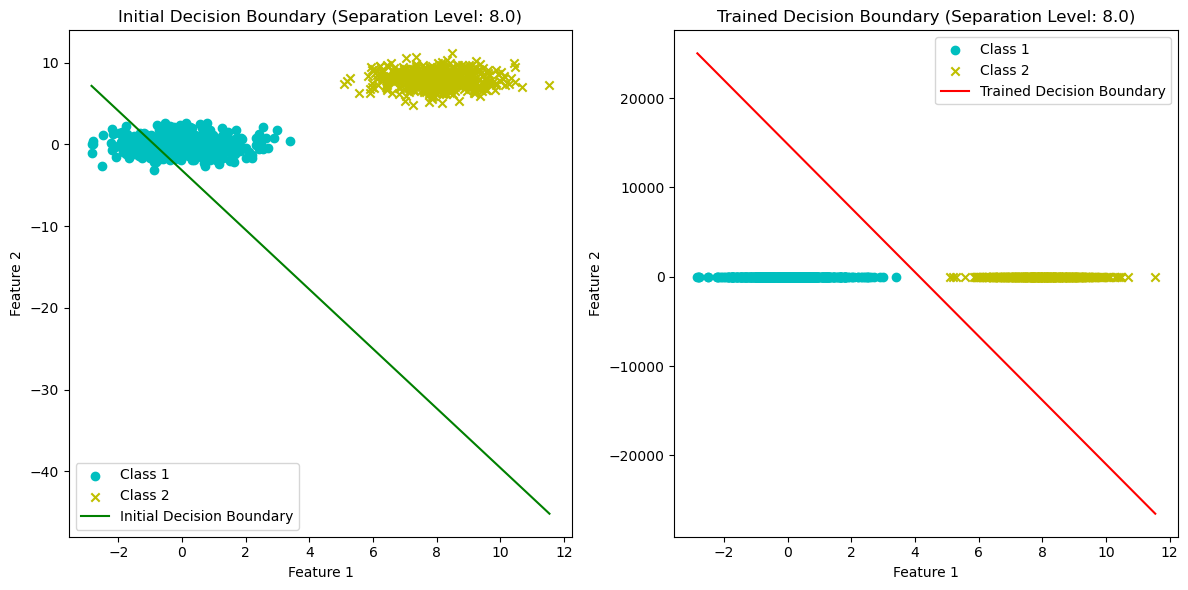

Average changes: 19


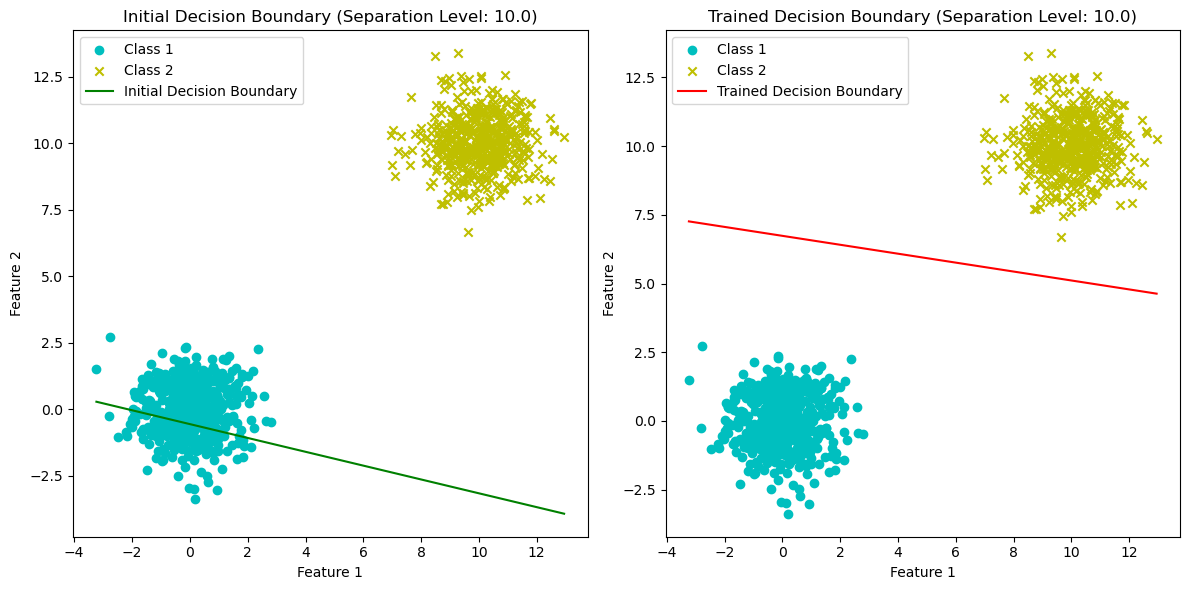

Average changes: 16


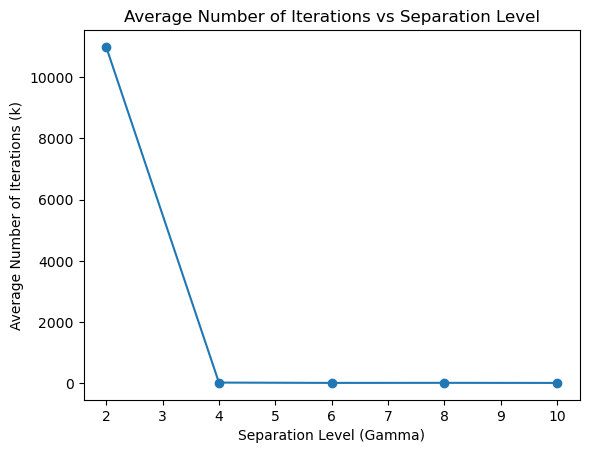

In [20]:
#Initializing separation levels
separation_levels = [2.0, 4.0, 6.0, 8.0, 10.0]

# Variable to save gamma values and average k values
gamma_values = []
average_k_values = []

for separation_level in separation_levels:
    X, y = gen_linearly_separable_dataset(1000, separation_level)
    K = 0
    for z in range(5):
        # Initialize weights
        initial_weights = initialize_weights(X.shape[1] + 1)

        # Adding bias term 
        X_bias = np.hstack((X, np.ones((X.shape[0], 1))))

        # calling function Train perceptron
        trained_weights, nb_changes = train_perceptron(X_bias, y, initial_weights, nb_epochs_max=100)
        K = K + nb_changes

        # Plot the dataset with separate decision boundaries
        if z == 4: 
            plot_separate_decision_boundaries(X, y, initial_weights, trained_weights, separation_level)
    average_k = K / 5
    gamma_values.append(separation_level)
    average_k_values.append(average_k)
    print('Average changes: %d' % (K / 5))

# Plotting graph
plt.plot(gamma_values, average_k_values, marker='o')
plt.title('Average Number of Iterations vs Separation Level')
plt.xlabel('Separation Level (Gamma)')
plt.ylabel('Average Number of Iterations (k)')
plt.show()


Q2] Gradient descent for training a linear classifier
[10 = loss formulation 4 + gradient computation 3 + update equation 3]
Consider solving the above problem (training a line for classifying a linearly separable 2D dataset)
using Gradient Descent algorithm. Think of a loss function (beyond simple MSE) based on our
classroom discussion on the desirable properties of a loss function. You may implement the analytical way of finding gradient for it. You may implement the basic version of gradient descent
update equation. Plot the dataset before and after training (with the classifier).


LOSS FORMATION

In [21]:
# Defining sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Defining cross-entropy loss function
def cross_entropy_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


GRADIENT COMPUTATION

In [22]:
# Function to computer gradient for loss function
def compute_gradient(X, y, y_pred):
    return np.dot(X.T, (y_pred - y)) / len(y)

UPDATE EQUATIONS

In [23]:
# Initialising parameters for data generation and training
size = 1000
separation_level = 6
learning_rate = 0.01
epochs = 3000

# Generate dataset
X, y = gen_linearly_separable_dataset(size, separation_level)
y = (y + 1) / 2  # Adjust labels to be 0 and 1

# Adding bias term to X
X_bias = np.hstack((np.ones((X.shape[0], 1)), X))

# Initializing weights
weights = np.random.randn(X_bias.shape[1])

# Training using Gradient Descent
for epoch in range(epochs):
    # Predictions using current weights
    y_pred = sigmoid(np.dot(X_bias, weights))
    
    # Calculating and update weights using gradient descent
    gradient = compute_gradient(X_bias, y, y_pred)
    weights -= learning_rate * gradient

PLOTTING OF GRAPH BEFORE TRAINING WITH DECISION BOUNDARY AND AFTER TRAINING EITH DECISION BOUNDARY

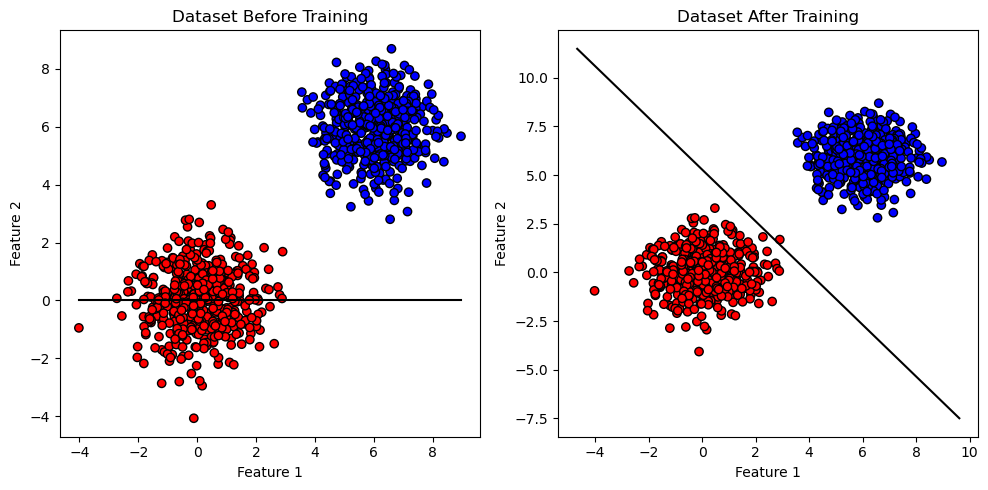

In [24]:
# Plotting the dataset before training with decision boundary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

# Decision boundary: 
x_vals = np.linspace(min(X[:, 0]), max(X[:, 0]), 100)
y_vals = np.zeros(100,)
plt.plot(x_vals, y_vals, c="k")

plt.title("Dataset Before Training")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Plotting the dataset after training with decision boundary
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
ax = plt.gca()

# Decision boundary:
x_vals = np.array(ax.get_xlim())
y_vals = -(weights[0] + weights[1] * x_vals) / weights[2]
plt.plot(x_vals, y_vals, c="k")

plt.title("Dataset After Training")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


Q3] MLP with a single hidden layer
[20 = dataset creation 5 + MLP definition 5 + backprop 10]
This question has two variations, and you are expected to attempt any one of the variations. The
second variation, if implemented properly, will fetch you a 5% bonus on this assignment.
Original Question: Consider a binary classification dataset that is not linearly separable in 2D
(e.g. data lying on the circumference two concentric circles). Train a Multi layer perceptron (MLP)
with a single hidden layer for classifying the same. You may use the loss function used in problem.You have to implement the backpropagation algorithm yourself

DATASET CREATION 

In [25]:
# Generating non-linearly separable dataset 
def generate_non_linear_dataset(size):
    theta = np.linspace(0, 2*np.pi, size)
    inner_circle = np.column_stack((np.cos(theta), np.sin(theta)))
    outer_circle = 2 * inner_circle
    X = np.vstack((inner_circle, outer_circle))
    y = np.hstack((np.zeros(size), np.ones(size)))
    return X, y

In [26]:
# Defining sigmoid derivative function
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [27]:
# Initializing weights and biases 
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W1 = np.random.randn(input_size, hidden_size)
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size)
    b2 = np.zeros((1, output_size))
    return W1, b1, W2, b2

# Forward pass through the network
def forward_pass(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    return z1, a1, z2, a2

BACKPROP

In [28]:
# Backward pass to update weights and biases using gradient descent
def backward_pass(X, y, z1, a1, z2, a2, W1, W2, b1, b2, learning_rate):
    m = len(X)
    # Compute gradients
    dz2 = a2 - y
    dW2 = np.dot(a1.T, dz2) / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m
    dz1 = np.dot(dz2, W2.T) * sigmoid_derivative(z1)
    dW1 = np.dot(X.T, dz1) / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m
    
    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2    
    return W1, b1, W2, b2

MLP definition [train_mlp]

In [29]:
# Training the MLP using backpropagation
def train_mlp(X, y, hidden_size, learning_rate, epochs):
    input_size = X.shape[1]
    output_size = 1  # Binary classification
    
    W1, b1, W2, b2 = initialize_parameters(input_size, hidden_size, output_size)
    for epoch in range(epochs):
        z1, a1, z2, a2 = forward_pass(X, W1, b1, W2, b2)
        loss = cross_entropy_loss(y, a2)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")
        W1, b1, W2, b2 = backward_pass(X, y, z1, a1, z2, a2, W1, W2, b1, b2, learning_rate)
    return W1, b1, W2, b2

# Make predictions using the trained MLP
def predict(X, W1, b1, W2, b2):
    _, _, _, a2 = forward_pass(X, W1, b1, W2, b2)
    return (a2 > 0.5).astype(int)

Plot decision boundary

Epoch 0, Loss: 1.2027643481768542


Epoch 1000, Loss: 0.6965481359938603
Epoch 2000, Loss: 0.6876498863372681
Epoch 3000, Loss: 0.6802405873421781
Epoch 4000, Loss: 0.6727106382187316
Epoch 5000, Loss: 0.6643196689272106
Epoch 6000, Loss: 0.6545938031829689
Epoch 7000, Loss: 0.6432047538487609
Epoch 8000, Loss: 0.6299595655039725
Epoch 9000, Loss: 0.6147958844468958
Epoch 10000, Loss: 0.5977525144081463
Epoch 11000, Loss: 0.5789328372943051
Epoch 12000, Loss: 0.5584919566528108
Epoch 13000, Loss: 0.5366543281945839
Epoch 14000, Loss: 0.5137369566673488
Epoch 15000, Loss: 0.4901423849361554
Epoch 16000, Loss: 0.4663074559439116
Epoch 17000, Loss: 0.44263112177021074
Epoch 18000, Loss: 0.41942095356938963
Epoch 19000, Loss: 0.39688054055640126


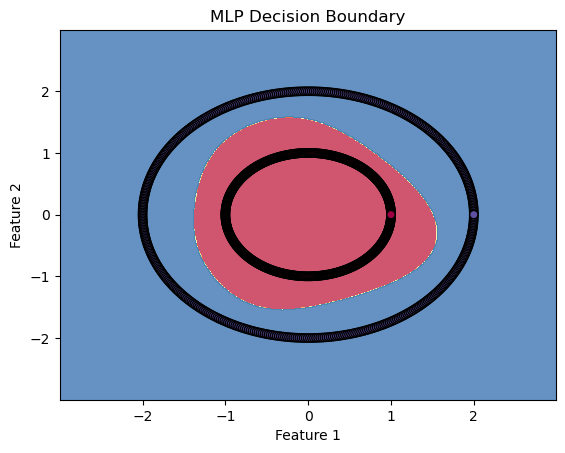

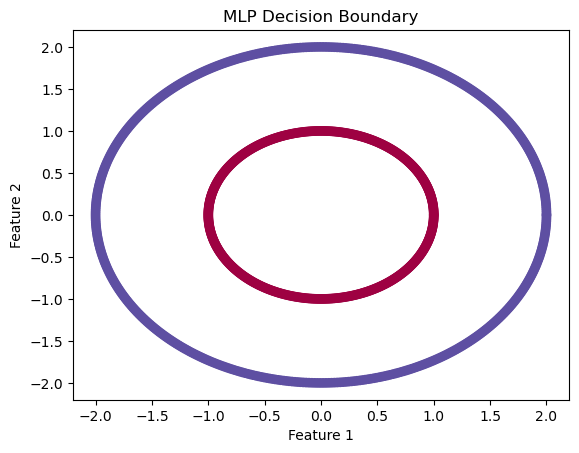

In [30]:
# Plotting decision boundary
def plot_decision_boundary(X, y, W1, b1, W2, b2):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    points = np.c_[xx.ravel(), yy.ravel()]
    predictions = predict(points, W1, b1, W2, b2)
    
    plt.contourf(xx, yy, predictions.reshape(xx.shape), cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, edgecolors='k')
    plt.title("MLP Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()
    prediction_2 = predict(X, W1, b1, W2, b2)
    plt.scatter(X[:,0],X[:,1],c=prediction_2 ,cmap=plt.cm.Spectral)
    plt.title("MLP Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Setting parameters
hidden_size = 5
learning_rate = 0.01
epochs = 20000

# Generating non-linear dataset
X, y = generate_non_linear_dataset(500)

# Training MLP
W1, b1, W2, b2 = train_mlp(X, y.reshape(-1, 1), hidden_size, learning_rate, epochs)

# Plotting decision boundary
plot_decision_boundary(X, y, W1, b1, W2, b2)